# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
from tensorflow import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_unit=10,num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i,n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units = n_units,activation='relu',name="hidden"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units = n_units,activation='relu',name="hidden"+str(i+1))(x)
    out = keras.layers.Dense(units = output_unit,activation='softmax',name='out')(x)
    
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    
    return model

In [6]:
## 超參數設定
LEARNING_RATE = [1e-1,1e-2,1e-3,1e-4,1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.9
OPTIMIZER = ['SGD','RMSprop','Adagrad','adam']

In [7]:
results = {}
for lr , optimizer in itertools.product(LEARNING_RATE,OPTIMIZER):
    keras.backend.clear_session()
    print("Experiment with LR = %.6f Momentum = %s" % (lr,optimizer))
    model = build_mlp(input_shape = x_train.shape[1:])
    model.summary()
    
    model.compile(loss="categorical_crossentropy",metrics=["accuracy"],optimizer=optimizer)
    
    model.fit(x_train,y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test,y_test),
              shuffle=True)
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "opt-%s" % optimizer
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}
                                       
"""
建立你的訓練與實驗迴圈並蒐集資料
"""


Experiment with LR = 0.100000 Momentum = SGD
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
hidden2 (Dense)              (None, 256)               131328    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               32896     
_________________________________________________________________
out (Dense)                  (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 2s 11ms/step - los

196/196 [==============================] - 2s 10ms/step - loss: 1.2269 - accuracy: 0.5697 - val_loss: 1.4542 - val_accuracy: 0.4889
Experiment with LR = 0.100000 Momentum = RMSprop
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
hidden2 (Dense)              (None, 256)               131328    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               32896     
_________________________________________________________________
out (Dense)                  (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
__

196/196 [==============================] - 4s 19ms/step - loss: 0.7925 - accuracy: 0.7136 - val_loss: 1.9547 - val_accuracy: 0.4849
Epoch 50/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7907 - accuracy: 0.7170 - val_loss: 1.9493 - val_accuracy: 0.4779
Experiment with LR = 0.100000 Momentum = Adagrad
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
hidden2 (Dense)              (None, 256)               131328    
_________________________________________________________________
hidden3 (Dense)              (None, 128)               32896     
_________________________________________________________________


196/196 [==============================] - 2s 12ms/step - loss: 1.5290 - accuracy: 0.4676 - val_loss: 1.5516 - val_accuracy: 0.4531
Epoch 49/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5254 - accuracy: 0.4691 - val_loss: 1.5510 - val_accuracy: 0.4519
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5221 - accuracy: 0.4699 - val_loss: 1.5584 - val_accuracy: 0.4503
Experiment with LR = 0.100000 Momentum = adam
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
hidden2 (Dense)              (None, 256)               131328    
_________________________________________________________

Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6836 - accuracy: 0.7555 - val_loss: 1.8061 - val_accuracy: 0.5081
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6691 - accuracy: 0.7618 - val_loss: 1.7331 - val_accuracy: 0.5215
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6769 - accuracy: 0.7579 - val_loss: 1.7213 - val_accuracy: 0.5237
Experiment with LR = 0.010000 Momentum = SGD
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
hidden2 (Dense)              (None, 256)               131328    
______________________________________________

196/196 [==============================] - 2s 11ms/step - loss: 1.2466 - accuracy: 0.5616 - val_loss: 1.3844 - val_accuracy: 0.5084
Epoch 48/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2423 - accuracy: 0.5635 - val_loss: 1.4220 - val_accuracy: 0.4965
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2399 - accuracy: 0.5656 - val_loss: 1.3863 - val_accuracy: 0.5026
Epoch 50/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2266 - accuracy: 0.5699 - val_loss: 1.3624 - val_accuracy: 0.5129
Experiment with LR = 0.010000 Momentum = RMSprop
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
__________________________________________

196/196 [==============================] - 4s 20ms/step - loss: 0.8288 - accuracy: 0.7044 - val_loss: 1.8173 - val_accuracy: 0.4881
Epoch 47/50
196/196 [==============================] - 4s 19ms/step - loss: 0.8082 - accuracy: 0.7108 - val_loss: 1.9807 - val_accuracy: 0.4880
Epoch 48/50
196/196 [==============================] - 4s 19ms/step - loss: 0.8031 - accuracy: 0.7113 - val_loss: 2.0362 - val_accuracy: 0.4686
Epoch 49/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7885 - accuracy: 0.7185 - val_loss: 1.9411 - val_accuracy: 0.4651
Epoch 50/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7831 - accuracy: 0.7191 - val_loss: 1.8671 - val_accuracy: 0.5050
Experiment with LR = 0.010000 Momentum = Adagrad
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
______________________________

196/196 [==============================] - 2s 11ms/step - loss: 1.5405 - accuracy: 0.4660 - val_loss: 1.5656 - val_accuracy: 0.4528
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5364 - accuracy: 0.4672 - val_loss: 1.5600 - val_accuracy: 0.4547
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5326 - accuracy: 0.4686 - val_loss: 1.5632 - val_accuracy: 0.4535
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5286 - accuracy: 0.4704 - val_loss: 1.5566 - val_accuracy: 0.4588
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5249 - accuracy: 0.4706 - val_loss: 1.5601 - val_accuracy: 0.4500
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5210 - accuracy: 0.4721 - val_loss: 1.5487 - val_accuracy: 0.4615
Experiment with LR = 0.010000 Momentum = adam
Model: "model"
_________________________________________________________________
Layer (type)         

Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6817 - accuracy: 0.7578 - val_loss: 1.7037 - val_accuracy: 0.5214
Epoch 46/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6770 - accuracy: 0.7579 - val_loss: 1.7546 - val_accuracy: 0.5197
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6505 - accuracy: 0.7682 - val_loss: 1.8089 - val_accuracy: 0.5203
Epoch 48/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6324 - accuracy: 0.7745 - val_loss: 1.8639 - val_accuracy: 0.5188
Epoch 49/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6350 - accuracy: 0.7725 - val_loss: 1.8601 - val_accuracy: 0.5008
Epoch 50/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6123 - accuracy: 0.7808 - val_loss: 1.8403 - val_accuracy: 0.5142
Experiment with LR = 0.001000 Momentum = SGD
Model: "model"
_________________________________________________________________
Layer (typ

196/196 [==============================] - 2s 10ms/step - loss: 1.2694 - accuracy: 0.5519 - val_loss: 1.4932 - val_accuracy: 0.4583
Epoch 45/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2653 - accuracy: 0.5552 - val_loss: 1.3876 - val_accuracy: 0.5084
Epoch 46/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2566 - accuracy: 0.5599 - val_loss: 1.3571 - val_accuracy: 0.5173
Epoch 47/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2503 - accuracy: 0.5608 - val_loss: 1.5140 - val_accuracy: 0.4785
Epoch 48/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2458 - accuracy: 0.5612 - val_loss: 1.4592 - val_accuracy: 0.4810
Epoch 49/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2410 - accuracy: 0.5654 - val_loss: 1.4946 - val_accuracy: 0.4690
Epoch 50/50
196/196 [==============================] - 2s 10ms/step - loss: 1.2295 - accuracy: 0.5658 - val_loss: 1.4185 - val_accuracy: 0.4863
Expe

196/196 [==============================] - 4s 19ms/step - loss: 0.8639 - accuracy: 0.6909 - val_loss: 1.8385 - val_accuracy: 0.4886
Epoch 44/50
196/196 [==============================] - 4s 19ms/step - loss: 0.8531 - accuracy: 0.6952 - val_loss: 1.8166 - val_accuracy: 0.4753
Epoch 45/50
196/196 [==============================] - 4s 19ms/step - loss: 0.8374 - accuracy: 0.6992 - val_loss: 1.8590 - val_accuracy: 0.4797
Epoch 46/50
196/196 [==============================] - 4s 19ms/step - loss: 0.8298 - accuracy: 0.7005 - val_loss: 1.7843 - val_accuracy: 0.4877
Epoch 47/50
196/196 [==============================] - 4s 19ms/step - loss: 0.8121 - accuracy: 0.7085 - val_loss: 1.8150 - val_accuracy: 0.4767
Epoch 48/50
196/196 [==============================] - 4s 19ms/step - loss: 0.8003 - accuracy: 0.7127 - val_loss: 2.0028 - val_accuracy: 0.4753
Epoch 49/50
196/196 [==============================] - 4s 19ms/step - loss: 0.7872 - accuracy: 0.7160 - val_loss: 2.0092 - val_accuracy: 0.4868
Epoc

196/196 [==============================] - 2s 11ms/step - loss: 1.5444 - accuracy: 0.4627 - val_loss: 1.5734 - val_accuracy: 0.4491
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5406 - accuracy: 0.4627 - val_loss: 1.5625 - val_accuracy: 0.4530
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5364 - accuracy: 0.4648 - val_loss: 1.5702 - val_accuracy: 0.4446
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5328 - accuracy: 0.4669 - val_loss: 1.5549 - val_accuracy: 0.4544
Epoch 46/50
196/196 [==============================] - 2s 11ms/step - loss: 1.5283 - accuracy: 0.4672 - val_loss: 1.5548 - val_accuracy: 0.4553
Epoch 47/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5253 - accuracy: 0.4674 - val_loss: 1.5593 - val_accuracy: 0.4473
Epoch 48/50
196/196 [==============================] - 3s 13ms/step - loss: 1.5210 - accuracy: 0.4703 - val_loss: 1.5501 - val_accuracy: 0.4574
Epoc

Epoch 42/50
196/196 [==============================] - 3s 14ms/step - loss: 0.7656 - accuracy: 0.7261 - val_loss: 1.5847 - val_accuracy: 0.5207
Epoch 43/50
196/196 [==============================] - 3s 14ms/step - loss: 0.7517 - accuracy: 0.7301 - val_loss: 1.6061 - val_accuracy: 0.5148
Epoch 44/50
196/196 [==============================] - 3s 15ms/step - loss: 0.7334 - accuracy: 0.7386 - val_loss: 1.6329 - val_accuracy: 0.5224
Epoch 45/50
196/196 [==============================] - 3s 14ms/step - loss: 0.7268 - accuracy: 0.7402 - val_loss: 1.6670 - val_accuracy: 0.5141
Epoch 46/50
196/196 [==============================] - 3s 14ms/step - loss: 0.7302 - accuracy: 0.7398 - val_loss: 1.6697 - val_accuracy: 0.5183
Epoch 47/50
196/196 [==============================] - 3s 14ms/step - loss: 0.7189 - accuracy: 0.7402 - val_loss: 1.7240 - val_accuracy: 0.5076
Epoch 48/50
196/196 [==============================] - 3s 14ms/step - loss: 0.6986 - accuracy: 0.7499 - val_loss: 1.7449 - val_accuracy:

196/196 [==============================] - 3s 14ms/step - loss: 1.2920 - accuracy: 0.5448 - val_loss: 1.4224 - val_accuracy: 0.4874
Epoch 42/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2789 - accuracy: 0.5491 - val_loss: 1.4206 - val_accuracy: 0.4949
Epoch 43/50
196/196 [==============================] - 3s 14ms/step - loss: 1.2782 - accuracy: 0.5513 - val_loss: 1.3968 - val_accuracy: 0.5001
Epoch 44/50
196/196 [==============================] - 3s 14ms/step - loss: 1.2716 - accuracy: 0.5540 - val_loss: 1.5289 - val_accuracy: 0.4559
Epoch 45/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2635 - accuracy: 0.5553 - val_loss: 1.4023 - val_accuracy: 0.5002
Epoch 46/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2512 - accuracy: 0.5623 - val_loss: 1.4168 - val_accuracy: 0.4921
Epoch 47/50
196/196 [==============================] - 3s 15ms/step - loss: 1.2538 - accuracy: 0.5603 - val_loss: 1.5187 - val_accuracy: 0.4610
Epoc

196/196 [==============================] - 6s 28ms/step - loss: 0.8855 - accuracy: 0.6832 - val_loss: 1.8063 - val_accuracy: 0.4784
Epoch 41/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8668 - accuracy: 0.6901 - val_loss: 1.6947 - val_accuracy: 0.4915
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8550 - accuracy: 0.6927 - val_loss: 1.8749 - val_accuracy: 0.4784
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8459 - accuracy: 0.6974 - val_loss: 1.8679 - val_accuracy: 0.4741
Epoch 44/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8314 - accuracy: 0.7035 - val_loss: 1.7425 - val_accuracy: 0.4941
Epoch 45/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8243 - accuracy: 0.7023 - val_loss: 1.8685 - val_accuracy: 0.4856
Epoch 46/50
196/196 [==============================] - 4s 20ms/step - loss: 0.7986 - accuracy: 0.7130 - val_loss: 1.9680 - val_accuracy: 0.4737
Epoc

196/196 [==============================] - 2s 12ms/step - loss: 1.5661 - accuracy: 0.4545 - val_loss: 1.5828 - val_accuracy: 0.4489
Epoch 40/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5610 - accuracy: 0.4567 - val_loss: 1.5770 - val_accuracy: 0.4475
Epoch 41/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5569 - accuracy: 0.4580 - val_loss: 1.5757 - val_accuracy: 0.4494
Epoch 42/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5523 - accuracy: 0.4602 - val_loss: 1.5722 - val_accuracy: 0.4497
Epoch 43/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5480 - accuracy: 0.4623 - val_loss: 1.5645 - val_accuracy: 0.4553
Epoch 44/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5443 - accuracy: 0.4639 - val_loss: 1.5732 - val_accuracy: 0.4456
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5399 - accuracy: 0.4649 - val_loss: 1.5605 - val_accuracy: 0.4534
Epoc

Epoch 39/50
196/196 [==============================] - 2s 12ms/step - loss: 0.7862 - accuracy: 0.7210 - val_loss: 1.5991 - val_accuracy: 0.5159
Epoch 40/50
196/196 [==============================] - 2s 12ms/step - loss: 0.7763 - accuracy: 0.7242 - val_loss: 1.5874 - val_accuracy: 0.5206
Epoch 41/50
196/196 [==============================] - 2s 13ms/step - loss: 0.7498 - accuracy: 0.7314 - val_loss: 1.5770 - val_accuracy: 0.5286
Epoch 42/50
196/196 [==============================] - 2s 13ms/step - loss: 0.7515 - accuracy: 0.7322 - val_loss: 1.6202 - val_accuracy: 0.5232
Epoch 43/50
196/196 [==============================] - 3s 13ms/step - loss: 0.7282 - accuracy: 0.7393 - val_loss: 1.5863 - val_accuracy: 0.5295
Epoch 44/50
196/196 [==============================] - 2s 13ms/step - loss: 0.7113 - accuracy: 0.7472 - val_loss: 1.6855 - val_accuracy: 0.5220
Epoch 45/50
196/196 [==============================] - 2s 12ms/step - loss: 0.6999 - accuracy: 0.7518 - val_loss: 1.6834 - val_accuracy:

196/196 [==============================] - 2s 11ms/step - loss: 1.3195 - accuracy: 0.5363 - val_loss: 1.3950 - val_accuracy: 0.5022
Epoch 39/50
196/196 [==============================] - 2s 11ms/step - loss: 1.3092 - accuracy: 0.5411 - val_loss: 1.4677 - val_accuracy: 0.4701
Epoch 40/50
196/196 [==============================] - 2s 11ms/step - loss: 1.3111 - accuracy: 0.5389 - val_loss: 1.4481 - val_accuracy: 0.4841
Epoch 41/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2978 - accuracy: 0.5442 - val_loss: 1.4938 - val_accuracy: 0.4680
Epoch 42/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2917 - accuracy: 0.5476 - val_loss: 1.4249 - val_accuracy: 0.4958
Epoch 43/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2829 - accuracy: 0.5513 - val_loss: 1.4039 - val_accuracy: 0.4998
Epoch 44/50
196/196 [==============================] - 2s 11ms/step - loss: 1.2763 - accuracy: 0.5542 - val_loss: 1.4749 - val_accuracy: 0.4797
Epoc

196/196 [==============================] - 4s 20ms/step - loss: 0.9300 - accuracy: 0.6674 - val_loss: 1.8122 - val_accuracy: 0.4714
Epoch 38/50
196/196 [==============================] - 4s 20ms/step - loss: 0.9162 - accuracy: 0.6723 - val_loss: 1.7089 - val_accuracy: 0.4727
Epoch 39/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8996 - accuracy: 0.6791 - val_loss: 1.7074 - val_accuracy: 0.4790
Epoch 40/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8855 - accuracy: 0.6842 - val_loss: 1.6536 - val_accuracy: 0.4934
Epoch 41/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8729 - accuracy: 0.6867 - val_loss: 1.8654 - val_accuracy: 0.4796
Epoch 42/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8563 - accuracy: 0.6945 - val_loss: 1.7434 - val_accuracy: 0.4818
Epoch 43/50
196/196 [==============================] - 4s 20ms/step - loss: 0.8422 - accuracy: 0.6987 - val_loss: 1.7912 - val_accuracy: 0.5010
Epoc

196/196 [==============================] - 2s 13ms/step - loss: 1.5687 - accuracy: 0.4555 - val_loss: 1.5871 - val_accuracy: 0.4442
Epoch 37/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5636 - accuracy: 0.4566 - val_loss: 1.5804 - val_accuracy: 0.4436
Epoch 38/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5591 - accuracy: 0.4590 - val_loss: 1.5800 - val_accuracy: 0.4478
Epoch 39/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5546 - accuracy: 0.4607 - val_loss: 1.5805 - val_accuracy: 0.4460
Epoch 40/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5505 - accuracy: 0.4615 - val_loss: 1.5729 - val_accuracy: 0.4519
Epoch 41/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5455 - accuracy: 0.4629 - val_loss: 1.5633 - val_accuracy: 0.4536
Epoch 42/50
196/196 [==============================] - 2s 12ms/step - loss: 1.5418 - accuracy: 0.4649 - val_loss: 1.5604 - val_accuracy: 0.4544
Epoc

Epoch 36/50
196/196 [==============================] - 2s 13ms/step - loss: 0.8316 - accuracy: 0.7011 - val_loss: 1.5121 - val_accuracy: 0.5139
Epoch 37/50
196/196 [==============================] - 2s 12ms/step - loss: 0.8135 - accuracy: 0.7092 - val_loss: 1.5403 - val_accuracy: 0.5175
Epoch 38/50
196/196 [==============================] - 3s 13ms/step - loss: 0.8021 - accuracy: 0.7126 - val_loss: 1.5351 - val_accuracy: 0.5204
Epoch 39/50
196/196 [==============================] - 2s 13ms/step - loss: 0.7805 - accuracy: 0.7211 - val_loss: 1.5375 - val_accuracy: 0.5205
Epoch 40/50
196/196 [==============================] - 3s 13ms/step - loss: 0.7710 - accuracy: 0.7263 - val_loss: 1.5583 - val_accuracy: 0.5232
Epoch 41/50
196/196 [==============================] - 2s 13ms/step - loss: 0.7483 - accuracy: 0.7345 - val_loss: 1.6142 - val_accuracy: 0.5223
Epoch 42/50
196/196 [==============================] - 2s 13ms/step - loss: 0.7325 - accuracy: 0.7408 - val_loss: 1.5918 - val_accuracy:

'\n建立你的訓練與實驗迴圈並蒐集資料\n'

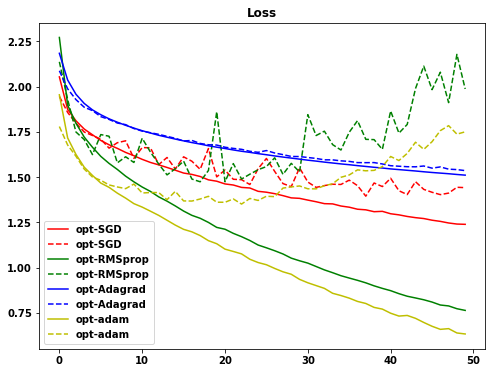

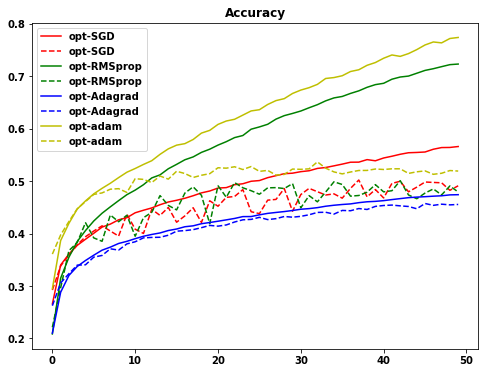

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()